In [1]:
# 데이터확보
# 전처리
# 모델정의  CNN
# 콜백(2개 다)
# 학습결과 시각화
# 저장된 모델 불러와서
# 평가하기

In [2]:
from tensorflow import keras

In [3]:
(x,y),(x_test,y_test) = keras.datasets.cifar10.load_data()
x = x / 255.0
x_test = x_test / 255.0

170498071/170498071 [==============================] - 14s 0us/step


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_val,y_train,y_val = train_test_split(x,y,random_state=42)

In [6]:
x_train.shape

(37500, 32, 32, 3)

In [10]:
model = keras.Sequential([
  keras.layers.Conv2D(32,kernel_size=3,activation='relu',input_shape=(32, 32, 3)),
  keras.layers.MaxPool2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(100,activation='relu'),
  keras.layers.Dense(10,activation='softmax')
])

In [11]:
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy' )

In [12]:
modelCheckPoint = keras.callbacks.ModelCheckpoint('cifar10.h5',save_best_only=True)
earlyStopPoing = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,
          callbacks=[modelCheckPoint,earlyStopPoing])

Epoch 1/200
1172/1172 [==============================] - 7s 5ms/step - loss: 1.5596 - accuracy: 0.4412 - val_loss: 1.2894 - val_accuracy: 0.5460
Epoch 2/200
1172/1172 [==============================] - 6s 5ms/step - loss: 1.2581 - accuracy: 0.5578 - val_loss: 1.2401 - val_accuracy: 0.5702
Epoch 3/200
1172/1172 [==============================] - 6s 5ms/step - loss: 1.1489 - accuracy: 0.5997 - val_loss: 1.1720 - val_accuracy: 0.5873
Epoch 4/200
1172/1172 [==============================] - 6s 5ms/step - loss: 1.0740 - accuracy: 0.6231 - val_loss: 1.1196 - val_accuracy: 0.6059
Epoch 5/200
1172/1172 [==============================] - 5s 4ms/step - loss: 1.0163 - accuracy: 0.6441 - val_loss: 1.0860 - val_accuracy: 0.6246
Epoch 6/200
1172/1172 [==============================] - 6s 5ms/step - loss: 0.9695 - accuracy: 0.6612 - val_loss: 1.0755 - val_accuracy: 0.6314
Epoch 7/200
1172/1172 [==============================] - 5s 4ms/step - loss: 0.9244 - accuracy: 0.6783 - val_loss: 1.0685 - val_ac

In [13]:
model = keras.Sequential([
  keras.layers.Conv2D(64,kernel_size=3,activation='relu',input_shape=(32, 32, 3)),
  keras.layers.Conv2D(32,kernel_size=3,activation='relu'),
  keras.layers.MaxPool2D(),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(100,activation='relu'),
  keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy' )
modelCheckPoint = keras.callbacks.ModelCheckpoint('cifar10_2.h5',save_best_only=True)
earlyStopPoing = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history2 = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,
          callbacks=[modelCheckPoint,earlyStopPoing])

Epoch 1/200
1172/1172 [==============================] - 10s 7ms/step - loss: 1.4958 - accuracy: 0.4585 - val_loss: 1.3093 - val_accuracy: 0.5315
Epoch 2/200
1172/1172 [==============================] - 7s 6ms/step - loss: 1.1558 - accuracy: 0.5922 - val_loss: 1.2032 - val_accuracy: 0.5827
Epoch 3/200
1172/1172 [==============================] - 7s 6ms/step - loss: 0.9955 - accuracy: 0.6485 - val_loss: 1.0406 - val_accuracy: 0.6347
Epoch 4/200
1172/1172 [==============================] - 7s 6ms/step - loss: 0.8876 - accuracy: 0.6865 - val_loss: 1.0064 - val_accuracy: 0.6442
Epoch 5/200
1172/1172 [==============================] - 7s 6ms/step - loss: 0.7954 - accuracy: 0.7175 - val_loss: 0.9974 - val_accuracy: 0.6585
Epoch 6/200
1172/1172 [==============================] - 7s 6ms/step - loss: 0.7179 - accuracy: 0.7442 - val_loss: 0.9868 - val_accuracy: 0.6616
Epoch 7/200
1172/1172 [==============================] - 6s 5ms/step - loss: 0.6397 - accuracy: 0.7723 - val_loss: 1.0315 - val_a

In [14]:
import matplotlib.pyplot as plt

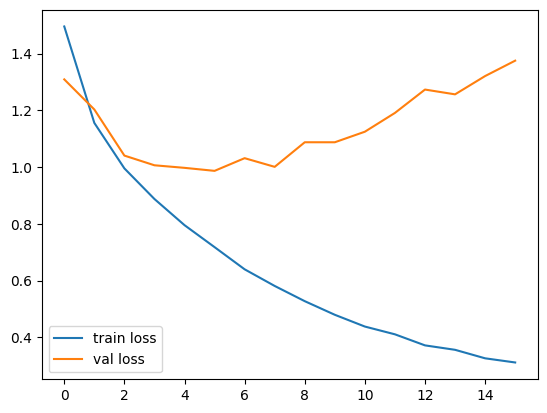

In [15]:
plt.plot(history2.history['loss'],label='train loss')
plt.plot(history2.history['val_loss'],label='val loss')
plt.legend()
plt.show()

In [16]:
m = keras.models.load_model('/content/cifar10_2.h5')

In [17]:
m.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0127 - accuracy: 0.6562


[1.012742280960083, 0.6561999917030334]